In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [12]:
# We are using the free flass dataset
# The objective is to tell the type of glass based on amount of other elements present
data = pd.read_csv('glass.data')

In [13]:
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
X = data.drop(labels=['index','Class'],axis=1)

In [15]:
X.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [16]:
len(X.columns)

9

In [17]:
X.shape

(214, 9)

In [18]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalize the data so that approximately follows a Gaussian Distribution
X_normalized = normalize(X_scaled)

# Convert the numpy array into a pandas Dataframe
X_normalized = pd.DataFrame(X_normalized)

In [19]:
X_normalized.describe()

,0,1,2,3,4,5,6,7,8
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,-0.061450,-0.059260,0.148673,-0.053154,0.030764,-0.004503,-0.078794,-0.102016,-0.054258
std,0.320634,0.342879,0.361910,0.327360,0.332820,0.196216,0.300417,0.256791,0.433274
min,-0.648303,-0.800448,-0.674046,-0.775183,-0.751565,-0.536416,-0.567561,-0.446701,-0.665244
25%,-0.283099,-0.330487,-0.167816,-0.305477,-0.241130,-0.181430,-0.303697,-0.251285,-0.402936
50%,-0.127830,-0.074378,0.288721,-0.087190,0.097985,0.057950,-0.113220,-0.181229,-0.180837
75%,0.151523,0.209247,0.417586,0.174994,0.287232,0.107550,0.090731,-0.097321,0.231425
max,0.842499,0.732559,0.697065,0.718431,0.678570,0.866830,0.752927,0.854850,0.934575


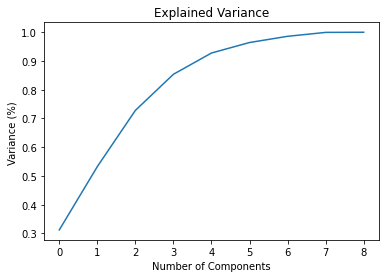

In [20]:
# Scree plot
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_normalized)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%) ') # For each component
plt.title('Explained Variance')
plt.show()

We are supposed to consider 4 PCA , but for example we will take 2 PCA as below .

In [21]:
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']
print(X_principal.head())

         P1        P2
0  0.152248 -0.611392
1 -0.361564  0.126191
2 -0.563242  0.427587
3 -0.651715 -0.135508
4 -0.683471  0.064435


In [29]:
df_default = DBSCAN(eps=0.0375,min_samples=6).fit(X_principal)
labels = df_default.labels_

In [30]:
labels

array([-1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1,  0, -1,  0, -1, -1,
        0, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [31]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [32]:
X_principal['Cluster Name'] = labels

In [33]:
X_principal

,P1,P2,Cluster Name
0,0.152248,-0.611392,-1
1,-0.361564,0.126191,-1
2,-0.563242,0.427587,-1
3,-0.651715,-0.135508,-1
4,-0.683471,0.064435,-1
...,...,...,...
209,0.675968,0.883592,-1
210,0.708276,0.784061,-1
211,0.746506,0.697096,-1
212,0.603729,0.839133,-1


In [35]:
X_principal[X_principal['Cluster Name']==0]

,P1,P2,Cluster Name
6,-0.644980,-0.011184,0
7,-0.619367,-0.057545,0
11,-0.699176,-0.061523,0
22,-0.679239,-0.107113,0
25,-0.690994,-0.071073,0
26,-0.638389,-0.028597,0
29,-0.692207,-0.073853,0
31,-0.640051,-0.017144,0
34,-0.643775,-0.055415,0
37,-0.654965,-0.033776,0


In [36]:
# Outliers
X_principal[X_principal['Cluster Name']==-1]

,P1,P2,Cluster Name
0,0.152248,-0.611392,-1
1,-0.361564,0.126191,-1
2,-0.563242,0.427587,-1
3,-0.651715,-0.135508,-1
4,-0.683471,0.064435,-1
...,...,...,...
209,0.675968,0.883592,-1
210,0.708276,0.784061,-1
211,0.746506,0.697096,-1
212,0.603729,0.839133,-1
